# Algoritmo K-means o K-medias

Este algoritmo se usa para agrupar datos de manera visual (con 2 variables). Lo hace tomando centroides en cada grupo y calculando distancia a cada una de las observaciones.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Libro1.csv",sep=';')
df.head() #tabla de datos con nombres edades y sueldo

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

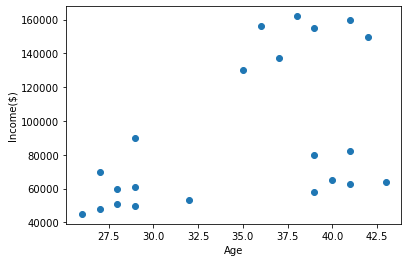

In [3]:
#queremos agrupar o predecir en que grupo estará un
#individuo dada su edad y su sueldo
plt.scatter(df.Age,df['Income($)']) 
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
#de manera visual podemos tomar 3 grupos de clasificación
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted #nos dará el numero de grupo en el que se
#encuentra cada una de nuestras observaciones

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [6]:
df['group']=y_predicted
df.head() 

,Name,Age,Income($),group
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [7]:
#para ver las posiciones de los centros de cada grupo
#o centroides usamos
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [ ]:
#VISUALIZAR LOS GRUPOS

Text(0, 0.5, 'Income ($)')

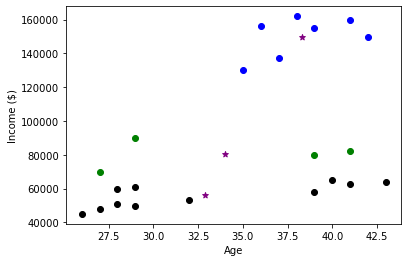

In [9]:
df1 = df[df.group==0]
df2 = df[df.group==1]
df3 = df[df.group==2]
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')


Vemos como la agrupación no es la ideal, y esto se debe a que los datos no estan estandarizados. La escala de los datos importa, y más aun cuando se consideran algortimos basados en distancias, como es el caso de K-means.

In [10]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [11]:
df.head()

,Name,Age,Income($),group
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


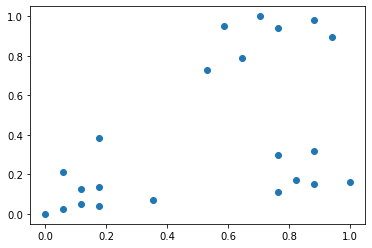

In [12]:
#el scatter plot seguirá siedo el mismo, pero en otra
#escala
plt.scatter(df.Age,df['Income($)'])

In [13]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [15]:
df['group']=y_predicted
df.head() #ahora cambiará la selección del grupo tras
#la estandarización de los datos

,Name,Age,Income($),group
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [16]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

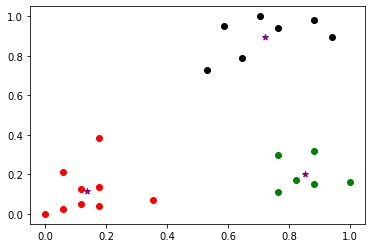

In [17]:
df1 = df[df.group==0]
df2 = df[df.group==1]
df3 = df[df.group==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')


Vemos como ahora ha clasificado exitosamente los 3 grupos
que se veian de manera visual. ¿Qué ocurre cuando no sabemos cuantos grupos tomar? Para ello se usa el método del codo, en el que se dibujará la suma de los errores estandar en torno al numero de grupos. Lo ideal sería localizar el codo del gráfico y tomar esa cantidad de grupos.


C:\Users\ciruj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


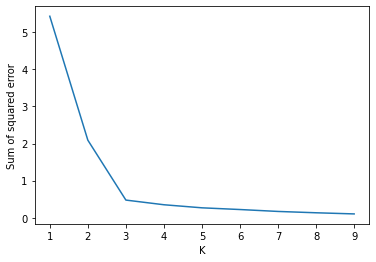

In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)